In [1]:
!pip install keras
!pip install Tensorflow
!pip install wordcloud
!pip install pronouncing
!pip install markovify

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, os
import nltk
import re
import random
import keras
import io
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adamax                ##cannot import it, does not work but it is solved
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pronouncing
import markovify
import re
import random
import numpy as np
import os
import keras
from keras.models import Sequential
from keras.layers import LSTM 
from keras.layers.core import Dense

In [4]:
import os.path

filename = input("name of the file: ")
print(os.path.abspath(filename))

name of the file: Bars.txt
/Users/clocreis/Desktop/AUC ALL CLASSES/SEMESTER 4/TEXT MINING/PROJECT/Bars.txt


In [30]:
data = pd.read_csv("Bars.txt", sep='\t',names=['text'])
data.head()

,text
0,text
1,Heartbreak drowned sorrows in a large steak
2,Why you always all on my back?
3,Why you gotta do me like that?
4,Why you gotta act like a bitch when I'm with you?


In [31]:
##Size of the dataset
print("Size of Dataset:",data.shape)

Size of Dataset: (172160, 1)


In [32]:
data.describe()

,text
count,172160
unique,140583
top,Yeah
freq,136


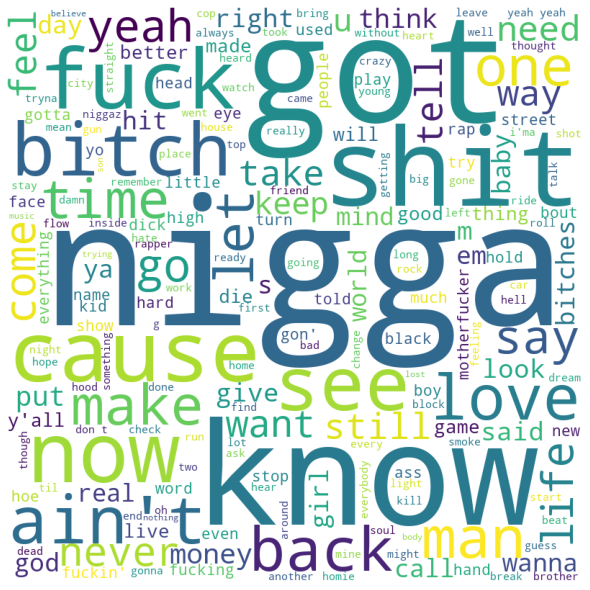

In [33]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

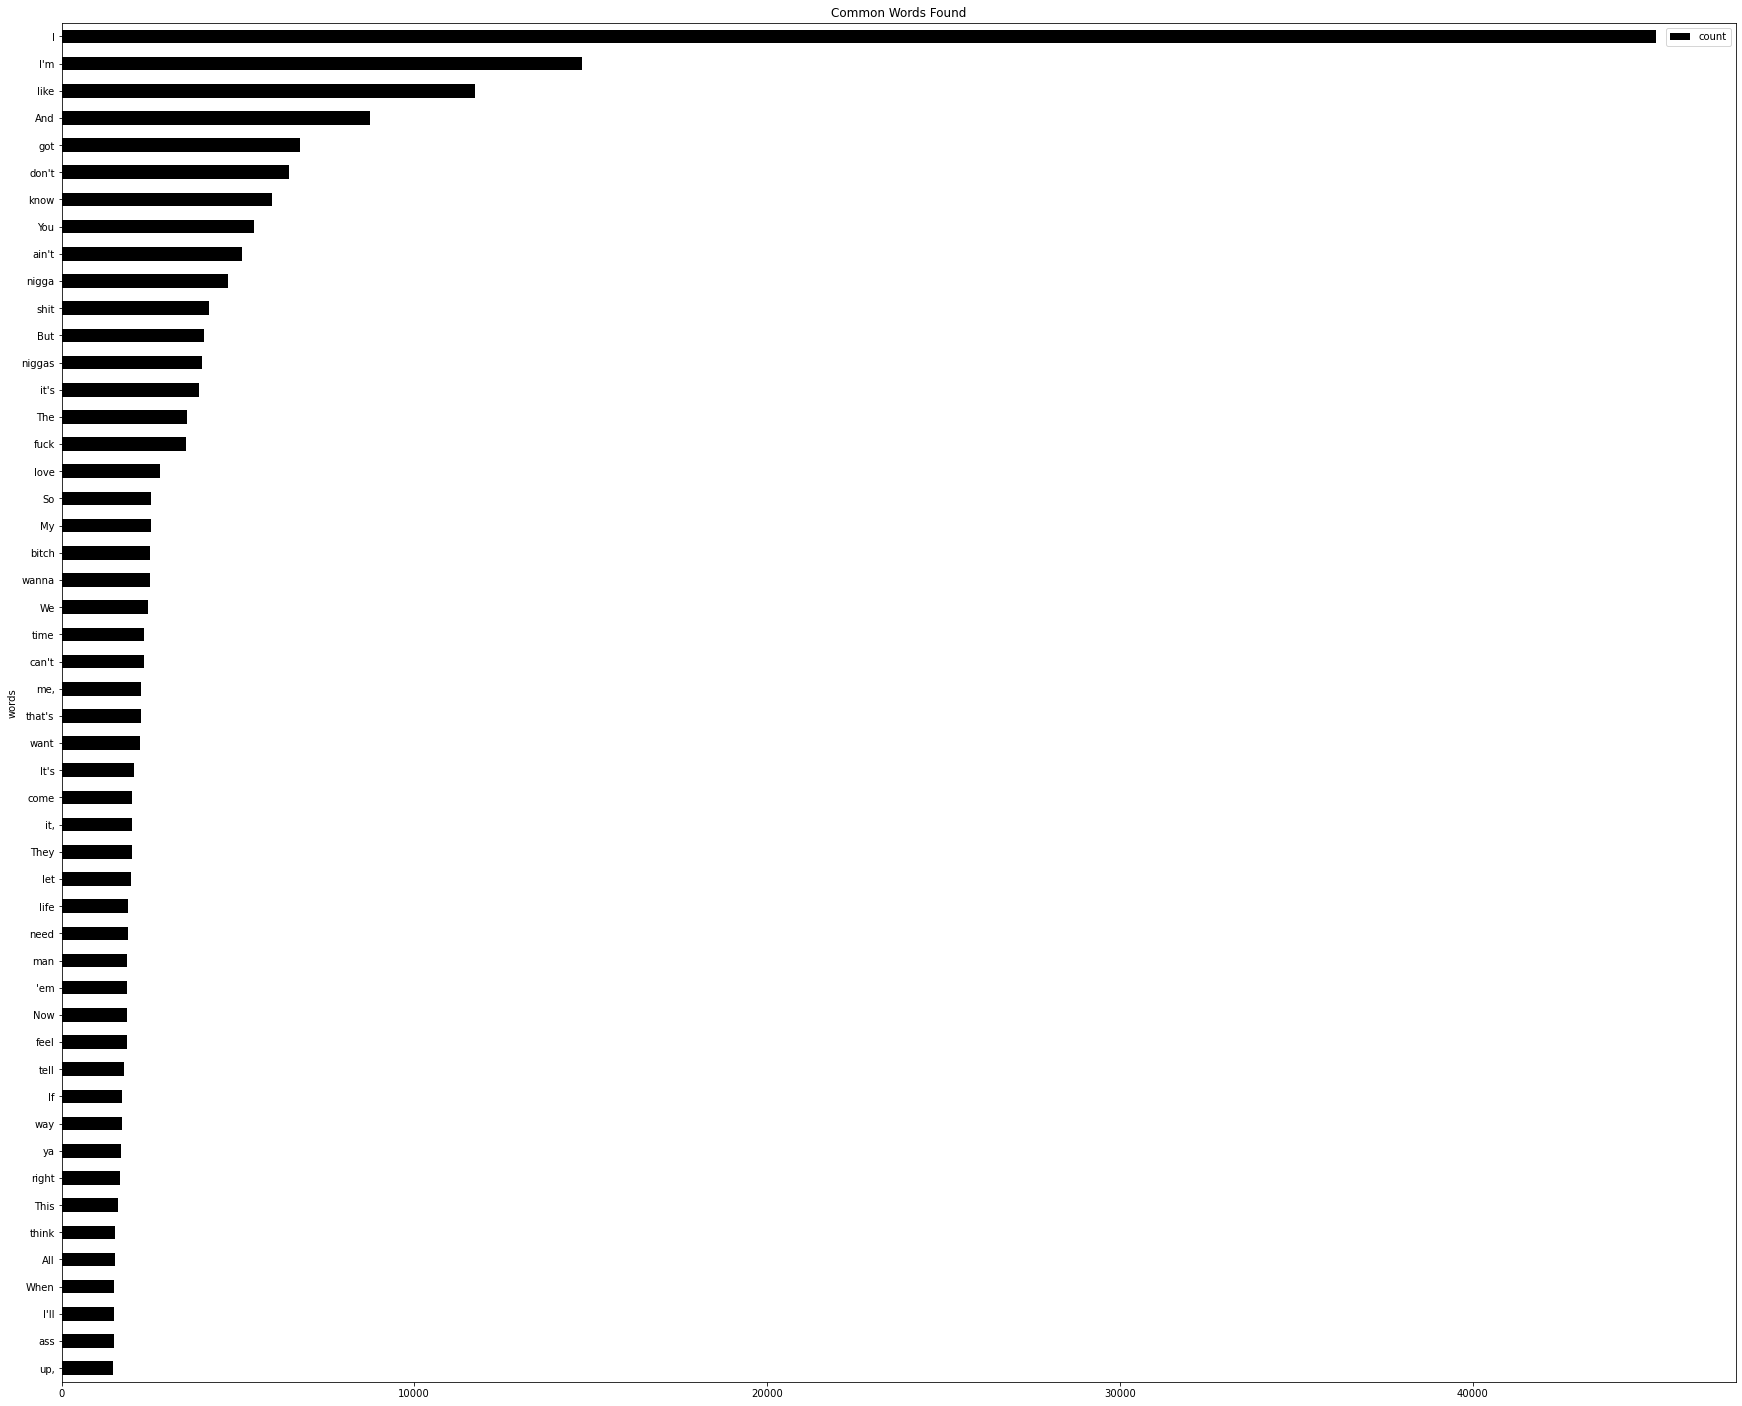

In [11]:
text_file = "bars.txt"

from collections import Counter
from gensim.parsing.preprocessing import remove_stopwords
import matplotlib.pyplot as plt
import pandas as pd

cnt = Counter()
bars = open(text_file, "r", encoding='utf-8').read()
filtered_bars = remove_stopwords(bars)

for text in filtered_bars.split():
    cnt[text] += 1


word_freq = pd.DataFrame(cnt.most_common(50),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(30,25))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="black")
ax.set_title("Common Words Found")
plt.show()

In [12]:
def create_network(depth):
	model = Sequential()
	model.add(LSTM(4, input_shape=(2, 2), return_sequences=True))
	for i in range(depth):
		model.add(LSTM(8, return_sequences=True))
	model.add(LSTM(2, return_sequences=True))
	model.summary()
	model.compile(optimizer='rmsprop',
              loss='mse')
	if artist + ".rap" in os.listdir(".") and train_mode == False:
		model.load_weights(str(artist + ".rap"))
		print("loading saved network: " + str(artist) + ".rap") 
	return model

In [13]:
def markov(text_file):
    ######
	read = open(text_file, "r", encoding='utf-8').read()
	text_model = markovify.NewlineText(read)
	return text_model

In [14]:
def syllables(line):
    count = 0
    for word in line.split(" "):
#        print(line)
        vowels = 'aeiouy'
        word = re.sub("[^A-Za-z0-9'\.\n]","", word)
        if not word:
            continue
        if word[0] in vowels:
            count +=1
            for index in range(1,len(word)):
                if word[index] in vowels and word[index-1] not in vowels:
                    count +=1
        if word.endswith('e'):
            count -= 1
        if word.endswith('le'):
            count+=1
        if count == 0:
            count +=1
    return count / maxsyllables

In [15]:
def rhymeindex(lyrics):
	if str(artist) + ".rhymes" in os.listdir(".") and train_mode == False:
		print ("loading saved rhymes from " + str(artist) + ".rhymes")
		return open(str(artist) + ".rhymes", "r",encoding='utf-8').read().split("\n")
	else:
		rhyme_master_list = []
		print ("Building list of rhymes:")
		for i in lyrics:
			word = re.sub(r"\W+", '', i.split(" ")[-1]).lower()
			rhymeslist = pronouncing.rhymes(word)
			rhymeslistends = []      
			for i in rhymeslist:
				rhymeslistends.append(i[-2:])
			try:
				rhymescheme = max(set(rhymeslistends), key=rhymeslistends.count)
			except Exception:
				rhymescheme = word[-2:]
			rhyme_master_list.append(rhymescheme)
		rhyme_master_list = list(set(rhyme_master_list))
		reverselist = [x[::-1] for x in rhyme_master_list]
		reverselist = sorted(reverselist)
		rhymelist = [x[::-1] for x in reverselist]
		print("List of Sorted 2-Letter Rhyme Ends:")
		print(rhymelist)
		f = open(str(artist) + ".rhymes", "w", encoding='utf-8')
		f.write("\n".join(rhymelist))
		f.close()
		return rhymelist

In [16]:
def rhyme(line, rhyme_list):
	word = re.sub(r"\W+", '', line.split(" ")[-1]).lower()
	rhymeslist = pronouncing.rhymes(word)
	rhymeslistends = []
	for i in rhymeslist:
		rhymeslistends.append(i[-2:])
	try:
		rhymescheme = max(set(rhymeslistends), key=rhymeslistends.count)
	except Exception:
		rhymescheme = word[-2:]
	try:
		float_rhyme = rhyme_list.index(rhymescheme)
		float_rhyme = float_rhyme / float(len(rhyme_list))
		return float_rhyme
	except Exception:
		float_rhyme = None
		return float_rhyme

In [17]:
def split_lyrics_file(text_file):
	text = open(text_file, encoding='utf-8').read()
	text = text.split("\n")
	while "" in text:
		text.remove("")
	return text

In [18]:
def generate_lyrics(text_model, text_file):
	bars = []
	last_words = []
	lyriclength = len(open(text_file,encoding='utf-8').read().split("\n"))
	count = 0
	markov_model = markov(text_file)
	
	while len(bars) < lyriclength / 9 and count < lyriclength * 2:
		bar = markov_model.make_sentence(max_overlap_ratio = .49, tries=100)
		if type(bar) != type(None) and syllables(bar) < 1:
			def get_last_word(bar):
				last_word = bar.split(" ")[-1]
				if last_word[-1] in "!.?,":
					last_word = last_word[:-1]
				return last_word
			last_word = get_last_word(bar)
			if bar not in bars and last_words.count(last_word) < 3:
				bars.append(bar)
				last_words.append(last_word)
				count += 1
	return bars

In [19]:
def build_dataset(lines, rhyme_list):
	dataset = []
	line_list = []
	for line in lines:
		line_list = [line, syllables(line), rhyme(line, rhyme_list)]
		dataset.append(line_list)
	x_data = []
	y_data = []
	for i in range(len(dataset) - 3):
		line1 = dataset[i    ][1:]
		line2 = dataset[i + 1][1:]
		line3 = dataset[i + 2][1:]
		line4 = dataset[i + 3][1:]
		x = [line1[0], line1[1], line2[0], line2[1]]
		x = np.array(x)
		x = x.reshape(2,2)
		x_data.append(x)
		y = [line3[0], line3[1], line4[0], line4[1]]
		y = np.array(y)
		y = y.reshape(2,2)
		y_data.append(y)
	x_data = np.array(x_data)
	y_data = np.array(y_data)
	return x_data, y_data

In [20]:
def compose_rap(lines, rhyme_list, lyrics_file, model):
	rap_vectors = []
	human_lyrics = split_lyrics_file(lyrics_file)
	initial_index = random.choice(range(len(human_lyrics) - 1))
	initial_lines = human_lyrics[initial_index:initial_index + 2]
	starting_input = []
	for line in initial_lines:
		starting_input.append([syllables(line), rhyme(line, rhyme_list)])
	starting_vectors = model.predict(np.array([starting_input]).flatten().reshape(1, 2, 2))
	rap_vectors.append(starting_vectors)
	for i in range(100):
		rap_vectors.append(model.predict(np.array([rap_vectors[-1]]).flatten().reshape(1, 2, 2)))
	return rap_vectors

In [21]:
def vectors_into_song(vectors, generated_lyrics, rhyme_list):
	print ("\n\n")	
	print ("Writing verse:")
	print ("\n\n")
	def last_word_compare(rap, line2):
		penalty = 0 
		for line1 in rap:
			word1 = line1.split(" ")[-1]
			word2 = line2.split(" ")[-1]
			if word1[-1] in "?!,.":
				word1 = word1[:-1]
			if word2[-1] in "?!,.":
				word2 = word2[:-1]
			if word1 == word2:
				penalty += 0.2
		return penalty
	def calculate_score(vector_half, syllables, rhyme, penalty):
		desired_syllables = vector_half[0]
		desired_rhyme = vector_half[1]
		desired_syllables = desired_syllables * maxsyllables
		desired_rhyme = desired_rhyme * len(rhyme_list)
		score = 1.0 - abs(float(desired_syllables) - float(syllables)) + abs(float(desired_rhyme) - float(rhyme)) - penalty
		return score
	dataset = []
	for line in generated_lyrics:
		line_list = [line, syllables(line), rhyme(line, rhyme_list)]
		dataset.append(line_list)
	rap = []
	vector_halves = []
	for vector in vectors:
		vector_halves.append(list(vector[0][0])) 
		vector_halves.append(list(vector[0][1]))
	for vector in vector_halves:
		scorelist = []
		for item in dataset:
			line = item[0]
			if len(rap) != 0:
				penalty = last_word_compare(rap, line)
			else:
				penalty = 0
			total_score = calculate_score(vector, item[1], item[2], penalty)
			score_entry = [line, total_score]
			scorelist.append(score_entry)
		fixed_score_list = [0]
		for score in scorelist:
			fixed_score_list.append(float(score[1]))
		max_score = max(fixed_score_list)
		for item in scorelist:
			if item[1] == max_score:
				rap.append(item[0])
				print (str(item[0]))
				for i in dataset:
					if item[0] == i[0]:
						dataset.remove(i)
						break
				break     
	return rap

In [22]:
def train(x_data, y_data, model):
	model.fit(np.array(x_data), np.array(y_data),
			  batch_size=2,
			  epochs=10,
			  verbose=1)
	model.save_weights(artist + ".rap")

In [23]:
def main(depth, train_mode):
	model = create_network(depth)
	text_model = markov(text_file)
	if train_mode == True:
		bars = split_lyrics_file(text_file)
	if train_mode == False:
		bars = generate_lyrics(text_model, text_file)
	rhyme_list = rhymeindex(bars)
	if train_mode == True:
		x_data, y_data = build_dataset(bars, rhyme_list)
		train(x_data, y_data, model)
	if train_mode == False:
		vectors = compose_rap(bars, rhyme_list, text_file, model)
		rap = vectors_into_song(vectors, bars, rhyme_list)
		f = open(rap_file, "w", encoding='utf-8')
		for bar in rap:
			f.write(bar)
			f.write("\n")

In [24]:
depth = 4 
maxsyllables = 8
artist = "artist"
rap_file = "temporary_poem.txt"

In [25]:
maxsyllables = 8
text_file = "Bars.txt"
train_mode = True        
main(depth, train_mode)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 4)              112       
                                                                 
 lstm_1 (LSTM)               (None, 2, 8)              416       
                                                                 
 lstm_2 (LSTM)               (None, 2, 8)              544       
                                                                 
 lstm_3 (LSTM)               (None, 2, 8)              544       
                                                                 
 lstm_4 (LSTM)               (None, 2, 8)              544       
                                                                 
 lstm_5 (LSTM)               (None, 2, 2)              88        
                                                                 
Total params: 2,248
Trainable params: 2,248
Non-trainabl

In [26]:
train_mode = False
main(depth, train_mode)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 4)              112       
                                                                 
 lstm_7 (LSTM)               (None, 2, 8)              416       
                                                                 
 lstm_8 (LSTM)               (None, 2, 8)              544       
                                                                 
 lstm_9 (LSTM)               (None, 2, 8)              544       
                                                                 
 lstm_10 (LSTM)              (None, 2, 8)              544       
                                                                 
 lstm_11 (LSTM)              (None, 2, 2)              88        
                                                                 
Total params: 2,248
Trainable params: 2,248
Non-traina

You thought I had these bitch niggaz this is real like Pac at the knee like Carmelo Anthony
Distractions will do you think I feel like David Duchovny
Some'll fall, but I forgot to call me Rodney
Then he put that big dummy
Hard for a person don't deserve me, my papa told me, blasphemy
And the red sun sinks at last into the light, find the light, find the couchie from Miami
So tell Cheryl to bring y'all to help me guide em, I lit a fire in the galaxy is primitive like Ptolemy
Awkward in the crowd hype like I'm Mr. Superfly
Its about time that the people that really JD swag lately
My tongue's numb, I don’t think they’re the shit, then I saw my ho, I got big literally
Young Money's eating, the label didn't think he completely lost blood and then he ought to be lonely?
So much money on the sirens, that means you need me, why won't you live now tortured by memories violently
The day that I'm tryna keep it moving properly
The moment I realized that I-I-I had something to do this respectfully
